In [7]:
## Task 1

import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# Connect to SQL lite database

jupiter_connection = sqlite3.connect('jupiter.db')

# Create a quesry to get the 'moons' table from the data

query = "SELECT * FROM moons"

# Read the moons query into a pandas dataframe 

moons_df = pd.read_sql_query(query, jupiter_connection)

# Extract column names

column_names = moons_df.columns.tolist()

# Close the connection so we can just work with the pandas dataframe

jupiter_connection.close()

# Print column names and moon names so we can extract data from specific moons

print(column_names)

print(moons_df['moon'])

['moon', 'period_days', 'distance_km', 'radius_km', 'mag', 'mass_kg', 'group', 'ecc', 'inclination_deg']
0          Adrastea
1             Aitne
2          Amalthea
3            Ananke
4             Aoede
5             Arche
6           Autonoe
7        Callirrhoe
8          Callisto
9             Carme
10            Carpo
11         Chaldene
12          Cyllene
13              Dia
14           Eirene
15            Elara
16          Erinome
17             Ersa
18          Euanthe
19         Eukelade
20          Eupheme
21          Euporie
22           Europa
23         Eurydome
24         Ganymede
25        Harpalyke
26         Hegemone
27           Helike
28         Hermippe
29            Herse
30          Himalia
31               Io
32          Iocaste
33           Isonoe
34             Kale
35       Kallichore
36           Kalyke
37             Kore
38             Leda
39         Lysithea
40        Megaclite
41            Metis
42            Mneme
43         Orthosie
44           Pa

In [9]:
# OOP part - classes

class Moons:
    # Initialise the data !!!!!
    def __init__(self, data):
        self.data = data

    def summary_stats(self):
        # Compute and display summary statistics of the dataframe as asked in the assessment criteria
        return self.data.describe()

    def frequency_counts(self, column):
        # Display frequency counts for a categorical column
        return self.data[column].value_counts()
    
    def count_fields(self):
        # Incase you want to know how many fields
        return len(self.data.columns)

    def histogram(self, column, bins=10):
        # Plot a histogram for a numerical column
        plt.hist(self.data[column], bins=bins, edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

    def box_plot(self, column):
        # Not very useful but interesting if you want to see ranges of values
        sns.boxplot(x=self.data[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

    def correlation_matrix(self):
        # Display a correlation matrix of numerical columns, points out potential correlations
        correlation_matrix = self.data.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()

    def scatter_plot(self, x_column, y_column):
        # Plot a scatter plot between two numerical columns
        plt.scatter(self.data[x_column], self.data[y_column])
        plt.title(f'Scatter Plot: {x_column} vs {y_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.show()
        
    def scatter_plot_distance_vs_mass(self):
        # Seems necessary to have this
        if self.data is not None:
            plt.scatter(self.data['distance_km'], self.data['mass_kg'], alpha=0.6)
            plt.xlabel('Distance from Jupiter (km)')
            plt.ylabel('Mass (kg)')
            plt.title('Distance vs. mass for Jupiters moons')
            plt.show()
        else:
            return "Cant find data"
        
    def scatter_plot_keplers_law(self):
        if self.data is not None:
            # Calculating T² (period_days squared) and a³ (distance_km cubed)
            self.data['T_squared'] = self.data['period_days'] ** 2
            self.data['a_cubed'] = self.data['distance_km'] ** 3

            plt.figure(figsize=(8, 6))
            plt.scatter(self.data['a_cubed'], self.data['T_squared'], alpha=0.6)
            plt.xlabel('Semi-major Axis Cubed (km³)')
            plt.ylabel('Orbital Period Squared (days²)')
            plt.title('Kepler\'s Third Law: T² vs a³')
            plt.show()
        else:
            return "No data"
    
    def comparitive_analysis(self, group_column, analysis_column):
        # Compare means or other statistics across groups
        return self.data.groupby(group_column)[analysis_column].describe()
    
    def get_moon_data(self, moon_name):
        # Select specific moons, look above for names of moons
        if moon_name in self.data['moon'].values:
            return self.data[self.data['moon'] == moon_name]
        else:
            return f"Cannot find: {moon_name}"
    
    # Task 2 stuff
    
        
    def linear_regression_model(self):
        # Convert semi-major axis to meters (from kilometers) and period to seconds (from days)
        self.data['a_m'] = self.data['distance_km'] * 1000  # 1 km = 1000 m
        self.data['T_s'] = self.data['period_days'] * 24 * 3600  # 1 day = 24 hours; 1 hour = 3600 seconds

        # Calculate T² (period in seconds squared) and a³ (semi-major axis in meters cubed)
        self.data['T_squared'] = self.data['T_s'] ** 2
        self.data['a_cubed'] = self.data['a_m'] ** 3

        # Convert to 2D arrays for the linear regression 'fit' method
        x = self.data['a_cubed'].values.reshape(-1, 1)
        y = self.data['T_squared'].values

        # Split data into training and test sets
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        # Create and fit the linear regression model
        model = LinearRegression(fit_intercept=True)
        model.fit(x_train, y_train)

        # Make predictions and evaluate the model
        y_prediction = model.predict(x_test)
        mse = mean_squared_error(y_test, y_prediction)

        # Return the model and its evaluation metrics
        return model, mse
    

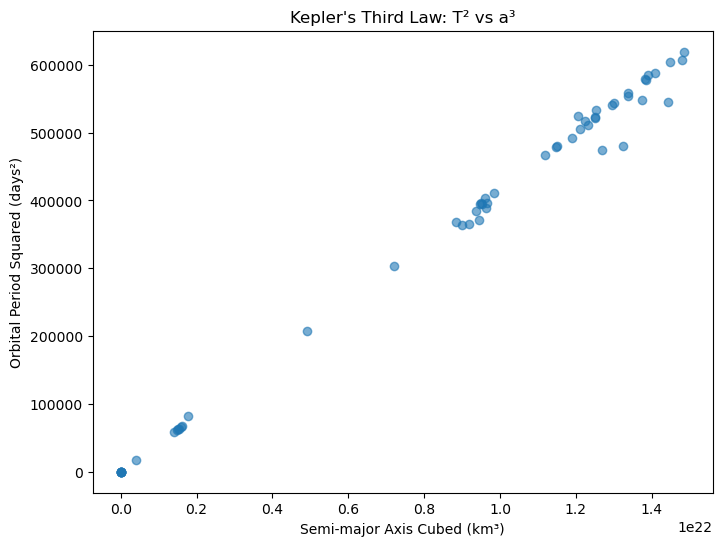

In [10]:
moons_data = Moons(moons_df)

moons_data.scatter_plot_keplers_law()

## Accoridng to google, the mass of jupiter is 1.898 × 10^27 kg

In [11]:
## Estimating jupiters mass using unclean data

model, mse = moons_data.linear_regression_model()

# Get slope coefficienrt
slope = model.coef_[0]

# G constant
G = 6.67e-11 

# Rearrange given equation, T^2/a^3 = the slope coefficient
jupiters_mass = (4 * np.pi ** 2) / (G * slope)

print("Estimated mass of Jupiter in kg", (jupiters_mass))
print("Mean Squared Error of the model", (mse))

## This gives us a great mass estimation but a high MSE (expected due to the size of the hyperparameters numbers)

Estimated mass of Jupiter in kg 1.9045035734306245e+27
Mean Squared Error of the model 3.9427519223478085e+28


In [12]:
## Lets stick with the unclean data as the jupiter mass estimate is great